<a href="https://colab.research.google.com/github/vsound1/book/blob/main/codelabs/Chapter-02-Compression-Techniques/Data-Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Quantization Colab

In this section, we will learn how to experiment with quantization.

## Defining the basic Quantization & Dequantization methods.

We will code a method `quantize` that quantizes a vector x, given `x`<sub>`min`</sub>, `x`<sub>`max`</sub>, and `b`. It should return the quantized values for a given `x`.

NOTE:  In order to use this colab effectively, update the function and then run the test code cell to verify your code works for basic tests. These tests aren't comprehensive. Please feel free to add more tests cases as needed.

In [ ]:
#@title Your code {display-mode: "code"}
# numpy is one of the most useful libraries for ML.
import numpy as np

# start edit 
def get_scale(x_min, x_max, b):
 # Compute scale as discussed.
 pass


"""Quantizing the given vector x."""
def quantize(x, x_min, x_max, b):
 # Clamp x to lie in [x_min, x_max].
 x = np.minimum(x, x_max)
 x = np.maximum(x, x_min)
 
 # Your code here. Don't forget to return the final quantized value.
 pass

# end edit

In [18]:
#@title Test code for quantization. Run after editing code above {display-mode: "form"}


import unittest
import numpy as np

class TestQuantize(unittest.TestCase):
    def test_get_scale(self):
        self.assertEqual(get_scale(0, 10, 4), 0.625)
        self.assertEqual(get_scale(-5, 5, 3), 1.25)
        
    def test_quantize(self):
        x = np.array([-2, 0, 3, 5, 10])
        x_min, x_max, b = -5, 5, 3
        x_q = quantize(x, x_min, x_max, b)
        np.testing.assert_array_equal(x_q, np.array([2, 4, 6, 7, 7]))
        
        x = np.array([-10, -5, 0, 5, 10])
        x_min, x_max, b = -10, 10, 4
        x_q = quantize(x, x_min, x_max, b)
        np.testing.assert_array_equal(x_q, np.array([0,  4,  8, 12, 15]))
        
        x = np.array([-5, -3, 0, 2, 7])
        x_min, x_max, b = -5, 7, 3
        x_q = quantize(x, x_min, x_max, b)
        np.testing.assert_array_equal(x_q, np.array([0, 1, 3, 4, 7]))

suite = unittest.TestLoader().loadTestsFromTestCase(TestQuantize)
unittest.TextTestRunner(verbosity=2).run(suite)

test_get_scale (__main__.TestQuantize) ... ok
test_quantize (__main__.TestQuantize) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.011s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

In [3]:
#@title solution {display-mode:"form"}

# numpy is one of the most useful libraries for ML.
import numpy as np

# begin solution

def get_scale(x_min, x_max, b):
 # Compute scale as discussed.
 return (x_max - x_min ) * 1.0 / (2**b)


"""Quantizing the given vector x."""
def quantize(x, x_min, x_max, b):
 # Clamp x to lie in [x_min, x_max].
 x = np.minimum(x, x_max)
 x = np.maximum(x, x_min)
 
 # Compute scale as discussed.
 scale = get_scale(x_min, x_max, b)
 x_q = np.floor((x - x_min) / scale)
 
 # Clamping the quantized value to be less than (2^b - 1).
 x_q = np.minimum(x_q, 2**b - 1)
 
 # Return x_q as an unsigned integer.
 # uint8 is the smallest data type supported by numpy.
 return x_q.astype(np.uint8)

 # end solution

In [19]:
# Construct the array that we wish to quantize. 
# We slightly exceed 10.0 to include 10.0 in our range.
x = np.arange(-10.0, 10.0 + 1e-6, 2.5)
print(x)

[-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10. ]


In [20]:
# Quantize the entire array in one go.
x_q = quantize(x, -10.0, 10.0, 3)
print(x_q)

[0 1 2 3 4 5 6 7 7]


### Dequantization
Lets dequantize the values that we've quantized. Write a function that takes in a value and dequantizes it to a value in the high precision domain.

In [9]:
#@title Your code {display-mode: "code"}
# start edit
def dequantize(x_q, x_min, x_max, b):
 # Your code here. Don't forget to return correct result.
 return 0

# end edit

In [21]:
#@title Test dequantize method {display-mode: "form"}
import unittest
import numpy as np

class TestDequantize(unittest.TestCase):
    def test_dequantize(self):
        x_q = np.array([0, 2, 4, 5, 7])
        x_min, x_max, b = -5, 5, 3
        x = dequantize(x_q, x_min, x_max, b)
        np.testing.assert_array_almost_equal(x, np.array([-5.  , -2.5 ,  0.  ,  1.25,  3.75]))
        
        x_q = np.array([0, 2, 8, 10, 15])
        x_min, x_max, b = -10, 10, 4
        x = dequantize(x_q, x_min, x_max, b)
        np.testing.assert_array_almost_equal(x, np.array([-10.  ,  -7.5 ,   0.  ,   2.5 ,   8.75]))
        
        x_q = np.array([0, 1, 2, 3, 5])
        x_min, x_max, b = -5, 7, 3
        x = dequantize(x_q, x_min, x_max, b)
        np.testing.assert_array_almost_equal(x, np.array([-5. , -3.5, -2. , -0.5,  2.5]))

suite = unittest.TestLoader().loadTestsFromTestCase(TestDequantize)
unittest.TextTestRunner(verbosity=2).run(suite)

test_dequantize (__main__.TestDequantize) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [4]:
#@title Solution to dequantize {display-mode: "form"}
def dequantize(x_q, x_min, x_max, b):
  # Compute the value of r the same way.
  s = get_scale(x_min, x_max, b)
  x = x_min + (s * x_q)
  return x

In [22]:
dequantize(x_q, -10.0, 10.0, 3)

array([-10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,   7.5])

## Mars Rover Problem

Let's try to simulate quantization on images. 

Image Source: [NASA](https://www.nasa.gov/sites/default/files/styles/full_width_feature/public/thumbnails/image/pia23378-16.jpg)

In [1]:
! wget https://github.com/EfficientDL/book/raw/main/codelabs/Chapter-02-Compression-Techniques/pia23378-16.jpeg
! ls

--2023-01-16 05:09:56--  https://github.com/EfficientDL/book/raw/main/codelabs/Chapter-02-Compression-Techniques/pia23378-16.jpeg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/EfficientDL/book/main/codelabs/Chapter-02-Compression-Techniques/pia23378-16.jpeg [following]
--2023-01-16 05:09:57--  https://raw.githubusercontent.com/EfficientDL/book/main/codelabs/Chapter-02-Compression-Techniques/pia23378-16.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129737 (127K) [image/jpeg]
Saving to: ‘pia23378-16.jpeg’

pia23378-16.jpeg    100%[===================>] 126.70K  --.-KB/s    in 0.008s  

20

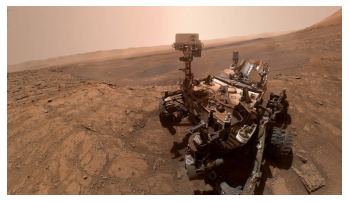

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = (mpimg.imread('pia23378-16.jpeg') / 255.0)
plt.axis('off')
plt.imshow(img)

In [5]:
img_min = np.min(img)
img_max = np.max(img)
print('Min: %d, Max: %d' % (img_min, img_max))

Min: 0, Max: 1


In [6]:
def simulate_transmission(img, b, input_plt):
  transmitted_image = quantize(img, 0.0, 1.0, b)
  decoded_image = dequantize(transmitted_image, 0.0, 1.0, b)
  input_plt.axis('off')
  input_plt.set_title("With b=" + str(b))
  input_plt.imshow(decoded_image) 

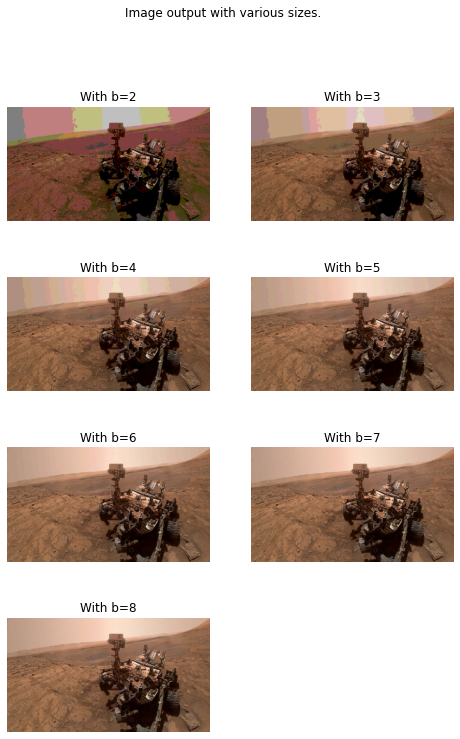

In [17]:
fig, axs = plt.subplots(4, 2, figsize=(8,12))
fig.suptitle('Image output with various sizes.')
for i in range(0, 7):
  simulate_transmission(img, i+2, axs[int(i/2)][i%2])

# We only have 7 images, clear the 8th one.
axs[3][1].remove()

## Simulating Quantization on a Dummy Fully-Connected layer

In [ ]:
# Set the seed so that we get the same initialization.
np.random.seed(10007)

def get_random_matrix(shape):
  return np.random.uniform(low=-1.0, high=1.0, size=shape)

# Populate the inputs, weights and bias.
inputs = get_random_matrix([10,3])
weights = get_random_matrix([3,5])
bias = get_random_matrix([5])

In [ ]:
print(weights)

[[-0.08321415 -0.66657766  0.71264132 -0.39179407  0.05601718]
 [-0.85867389 -0.00864216 -0.15913464 -0.00676971  0.33190099]
 [-0.25760764 -0.82441528  0.57125625  0.74180458 -0.75251044]]


In [ ]:
y = np.matmul(inputs, weights) + bias
print(y)

[[ 0.00511569 -0.89318885  0.51116489  0.57396818 -0.34144945]
 [ 1.34222938 -0.1270941   0.34179184 -0.75315659  0.39381581]
 [ 0.9916536  -1.15636837  0.96734553  0.53233659 -0.7927911 ]
 [ 0.43675795 -1.26224397  0.95964283  0.53281738 -0.62054885]
 [ 1.13107671  0.0891375  -0.02051028 -0.25658162  0.20175099]
 [-0.25101365 -0.83651706  0.45385709  0.36579153 -0.07140417]
 [ 0.05000226  0.02090654 -0.06632239 -0.70140683  0.91099702]
 [ 0.33570299 -1.31070844  1.04055933  0.29474841 -0.42930995]
 [ 0.1520569  -0.61360656  0.62168381 -0.96024268  0.81257321]
 [ 0.05897928 -0.03343131 -0.041293   -0.57477116  0.79554345]]


In [ ]:
y = np.maximum(y, 0)
print(y)

[[0.00511569 0.         0.51116489 0.57396818 0.        ]
 [1.34222938 0.         0.34179184 0.         0.39381581]
 [0.9916536  0.         0.96734553 0.53233659 0.        ]
 [0.43675795 0.         0.95964283 0.53281738 0.        ]
 [1.13107671 0.0891375  0.         0.         0.20175099]
 [0.         0.         0.45385709 0.36579153 0.        ]
 [0.05000226 0.02090654 0.         0.         0.91099702]
 [0.33570299 0.         1.04055933 0.29474841 0.        ]
 [0.1520569  0.         0.62168381 0.         0.81257321]
 [0.05897928 0.         0.         0.         0.79554345]]


In [ ]:
w_min = np.min(weights)
w_max = np.max(weights)
print(w_min, w_max)

-0.8586738858321132 0.7418045798990329


In [ ]:
weights_quantized = quantize(weights, w_min, w_max, 8)
print(weights_quantized)

[[124  30 251  74 146]
 [  0 135 111 136 190]
 [ 96   5 228 255  16]]


In [ ]:
weights_dequantized = dequantize(weights_quantized, w_min, w_max, 8)
print(weights_dequantized)

[[-0.08344213 -0.67111782  0.71054523 -0.39603558  0.05409899]
 [-0.85867389 -0.01467157 -0.16471643 -0.0084197   0.32918123]
 [-0.25849446 -0.82741454  0.56675225  0.73555271 -0.75864398]]


In [ ]:
print(weights)

[[-0.08321415 -0.66657766  0.71264132 -0.39179407  0.05601718]
 [-0.85867389 -0.00864216 -0.15913464 -0.00676971  0.33190099]
 [-0.25760764 -0.82441528  0.57125625  0.74180458 -0.75251044]]


In [ ]:
np.sqrt(np.mean((weights_dequantized - weights) ** 2))

0.003925407435722753

In [ ]:
y_via_quant = np.maximum(np.matmul(inputs, weights_dequantized) + bias, 0)
print(y_via_quant)

[[0.00465006 0.         0.50726087 0.57192647 0.        ]
 [1.34289989 0.         0.34965774 0.         0.40061985]
 [0.99103964 0.         0.96913415 0.53045113 0.        ]
 [0.43607818 0.         0.95754279 0.52921343 0.        ]
 [1.13163941 0.09731423 0.         0.         0.20744122]
 [0.         0.         0.44860521 0.36376202 0.        ]
 [0.05074402 0.01993939 0.         0.         0.91419542]
 [0.33511031 0.         1.03784683 0.290782   0.        ]
 [0.15252488 0.         0.62064439 0.         0.81421158]
 [0.05962415 0.         0.         0.         0.79821172]]


In [ ]:
print(y)

[[0.00511569 0.         0.51116489 0.57396818 0.        ]
 [1.34222938 0.         0.34179184 0.         0.39381581]
 [0.9916536  0.         0.96734553 0.53233659 0.        ]
 [0.43675795 0.         0.95964283 0.53281738 0.        ]
 [1.13107671 0.0891375  0.         0.         0.20175099]
 [0.         0.         0.45385709 0.36579153 0.        ]
 [0.05000226 0.02090654 0.         0.         0.91099702]
 [0.33570299 0.         1.04055933 0.29474841 0.        ]
 [0.1520569  0.         0.62168381 0.         0.81257321]
 [0.05897928 0.         0.         0.         0.79554345]]


In [ ]:
np.sqrt(np.mean((y_via_quant - y) ** 2))

0.002573583625884542